This notebook contains some simple ways to pick markers based on the stats calculated in the first notebook.
* Currently only the first 7 chroms are available so that is what was used

## Setup

In [1]:
!pip install -q --no-warn-conflicts malariagen-data==7.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.5/302.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta

In [2]:
from malariagen_data.pv4 import Pv4
import pandas as pd
import numpy as np
import allel

import os
import matplotlib.pyplot as plt
# import dask.array as da
# import collections
# import math

# TMP

this will be at the end of notebook one, but doing it here for now

Need to replace this with just importing the output file

In [3]:
# will do this at the bottom of notebook one, but here for now
# Concatanate Data from each chromosome into one dataframe

results_directory = 'sliding_window_results'
i=0
for filename in os.listdir(results_directory):
    f = os.path.join(results_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_csv(f, index_col=0)
        # Add chromosome name columns
        df.insert(loc=0, column='chrom', value=filename.replace('_windowed_heterozygosity.csv',''))
        # Join dataframes together
        if i==0:
            results_df = df
        else:
            results_df = pd.concat([results_df, df], ignore_index=True)
        i+=1
results_df = results_df.sort_values('chrom')

In [4]:
results_df

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
8109,PvP01_01_v1,532993,533192,2,[ 1 407 86 1 1 2 117],"[0, 4]",[3],"[0.0016260162601626016, 0.6617886178861788, 0....",7,0.913945,0.506270
8041,PvP01_01_v1,463193,463392,2,[410 1 106 2 1 85 10],[],"[1, 3, 4]","[0.6666666666666666, 0.0016260162601626016, 0....",7,0.953352,0.506466
8040,PvP01_01_v1,463093,463292,1,[517 3 95],[],[1],"[0.8406504065040651, 0.004878048780487805, 0.1...",3,0.460399,0.269422
8039,PvP01_01_v1,462593,462792,1,[375 4 236],[],[1],"[0.6097560975609756, 0.0065040650406504065, 0....",3,0.701937,0.480899
8038,PvP01_01_v1,462293,462492,1,[ 1 543 3 68],[0],[2],"[0.0016260162601626016, 0.8829268292682927, 0....",4,0.389829,0.208188
...,...,...,...,...,...,...,...,...,...,...,...
10480,PvP01_13_v1,1039499,1039698,5,[ 91 132 1 8 82 2 1 1 40 17 1 ...,"[12, 21]","[2, 6, 7, 10, 11, 17, 19, 20, 25]","[0.14796747967479676, 0.2146341463414634, 0.00...",27,2.389489,0.880608
10479,PvP01_13_v1,1039449,1039648,3,[223 1 92 1 41 17 1 1 1 12 97 ...,"[8, 12]","[1, 3, 6, 7, 11]","[0.36260162601626017, 0.0016260162601626016, 0...",15,1.755147,0.779314
10478,PvP01_13_v1,1039399,1039598,3,[254 35 2 1 98 3 102 1 62 1 23 ...,[3],"[2, 5, 7, 9]","[0.41300813008130083, 0.056910569105691054, 0....",13,1.740232,0.760082
10476,PvP01_13_v1,1038649,1038848,1,[407 208],[],[],"[0.6617886178861788, 0.3382113821138211]",2,0.639842,0.447649


# Plot number of SNPs in each window and heterozygosity of each window


In [5]:
man_colours = ['#C62828','#D81B60','#8E24AA','#5E35B1','#3949AB','#1E88E5','#039BE5','#00ACC1','#00897B','#43A047','#7CB342','#C0CA33','#FFB300','#F4511E']


In [6]:
def plot_man(df, field, maxy):

    rcParams = plt.rcParams
    rcParams['font.size'] = 14
    rcParams['axes.labelsize'] = 14

    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=12

    fig, ax = plt.subplots(figsize=(16, 7))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_ylim([0,maxy])
    ax.set_xlabel('Chromosome')
    ax.set_ylabel(f'{field} per microhaplotypetype')

    colour_i=0
    chrom_num = 0
    for chrom in df.chrom.unique():
        chrom_num += 1
        chrom_df = df.loc[df['chrom']==chrom]
        windows = chrom_df.shape[0]
        increment = 1/windows
        delta = 0
        x = chrom_num - (windows*increment/2)
        for index, row in chrom_df.iterrows():
            ax.scatter(x, row[field], c=man_colours[colour_i],s=row[field])
            x+=increment
        colour_i+=1
    plt.xticks(np.arange(1, 15, 1.0), rotation = 45)

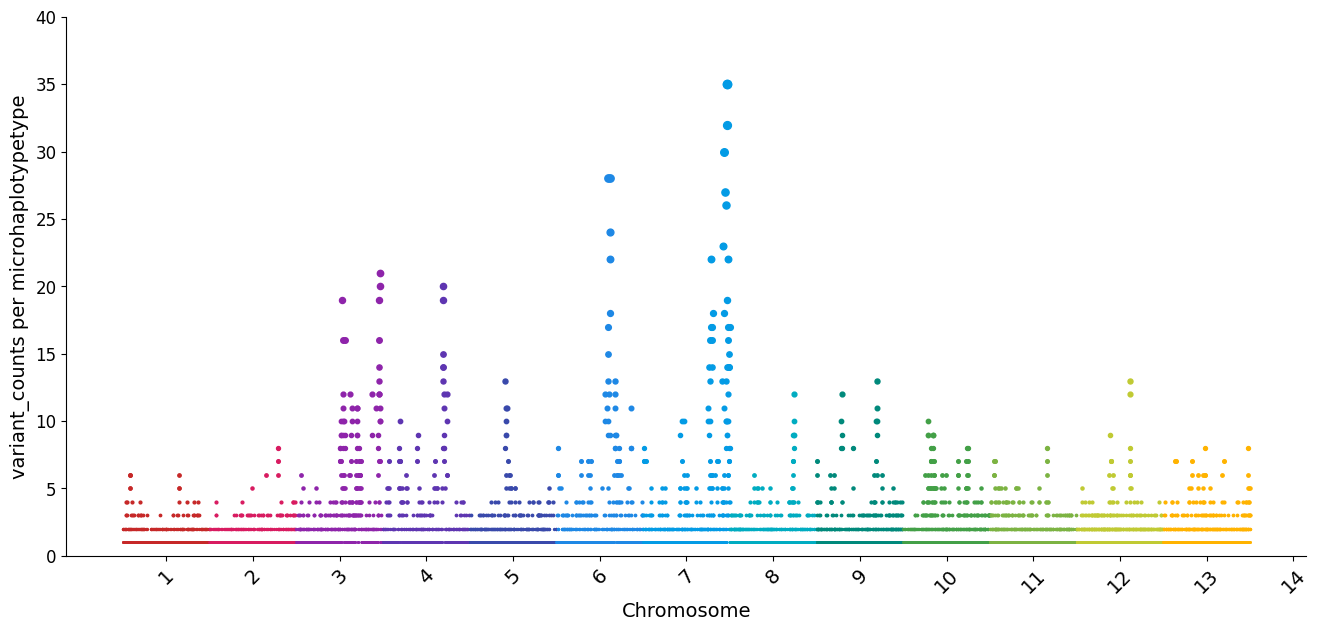

In [7]:
# Plot N Snps per microhaplotypes
plot_man(results_df, 'variant_counts',40)

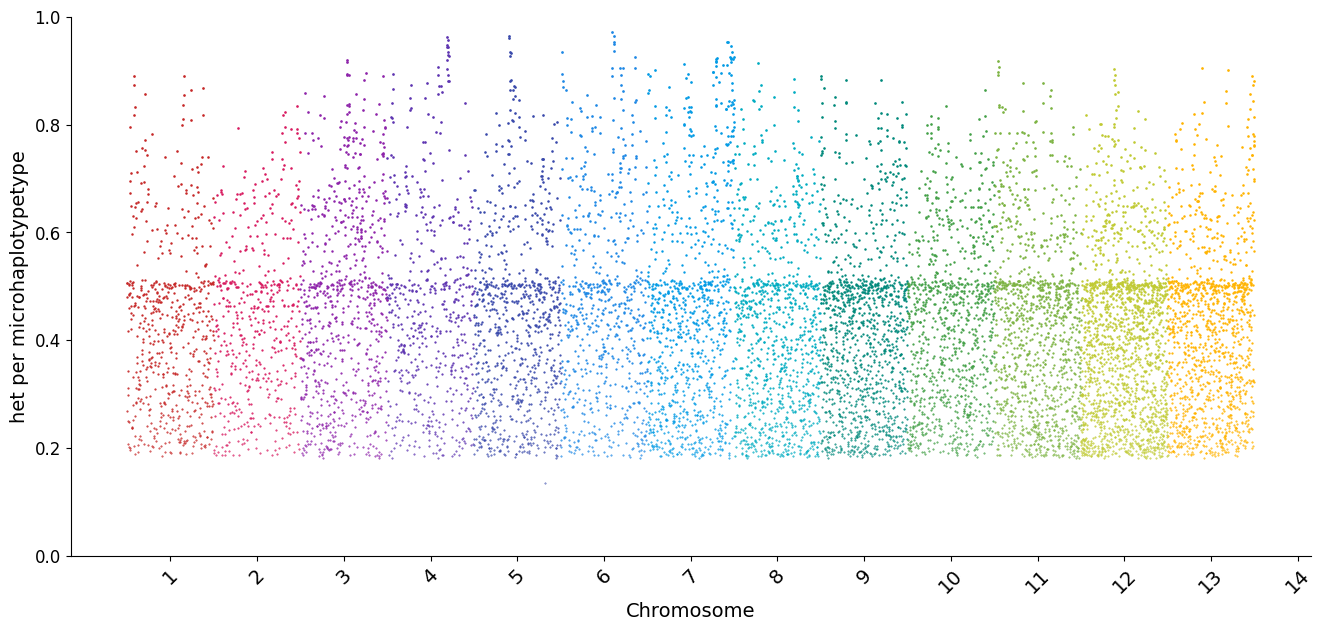

In [8]:
plot_man(results_df, 'het',1)

# Selection

Many ways to select markers. Here are two simple methods

First just select 100 with the highest het

In [39]:
unique_chroms = results_df.chrom.unique()

In [9]:
# Filter down to only include between 3 and 10
snp_results_3_10_df = results_df.loc[results_df.variant_counts.between(3,10)]
snp_results_3_10_df

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
8062,PvP01_01_v1,483743,483942,3,[305 2 36 1 29 158 40 44],[],"[1, 3]","[0.4959349593495935, 0.0032520325203252032, 0....",8,1.402615,0.673033
8061,PvP01_01_v1,483693,483892,4,[139 1 12 1 1 13 89 83 1 189 85 1],[],"[1, 3, 4, 8]","[0.22601626016260162, 0.0016260162601626016, 0...",12,1.732804,0.795373
8060,PvP01_01_v1,483643,483842,3,[152 2 102 83 1 274 1],[],"[1, 4]","[0.24715447154471545, 0.0032520325203252032, 0...",7,1.313453,0.694682
8055,PvP01_01_v1,474843,475042,3,[ 2 107 2 71 1 432],[0],"[2, 4]","[0.0032520325203252032, 0.17398373983739837, 0...",6,0.849305,0.462957
8054,PvP01_01_v1,474693,474892,4,[ 1 107 2 66 196 1 5 1 236],"[0, 5]","[2, 7]","[0.0016260162601626016, 0.17398373983739837, 0...",9,1.364845,0.709303
...,...,...,...,...,...,...,...,...,...,...,...
10484,PvP01_13_v1,1045249,1045448,3,[ 2 199 1 45 3 1 263 7 57 1 36],"[0, 5]","[2, 4, 9]","[0.0032520325203252032, 0.3235772357723577, 0....",11,1.433154,0.694877
10481,PvP01_13_v1,1039599,1039798,3,[ 1 91 1 192 1 36 175 2 112 1 3],[0],"[2, 4, 7, 9]","[0.0016260162601626016, 0.14796747967479676, 0...",11,1.566459,0.763033
10480,PvP01_13_v1,1039499,1039698,5,[ 91 132 1 8 82 2 1 1 40 17 1 ...,"[12, 21]","[2, 6, 7, 10, 11, 17, 19, 20, 25]","[0.14796747967479676, 0.2146341463414634, 0.00...",27,2.389489,0.880608
10479,PvP01_13_v1,1039449,1039648,3,[223 1 92 1 41 17 1 1 1 12 97 ...,"[8, 12]","[1, 3, 6, 7, 11]","[0.36260162601626017, 0.0016260162601626016, 0...",15,1.755147,0.779314


In [10]:
# Selected the top 100
snp_highest_het_3_10 = snp_results_3_10_df.sort_values('het',ascending=False).head(100)

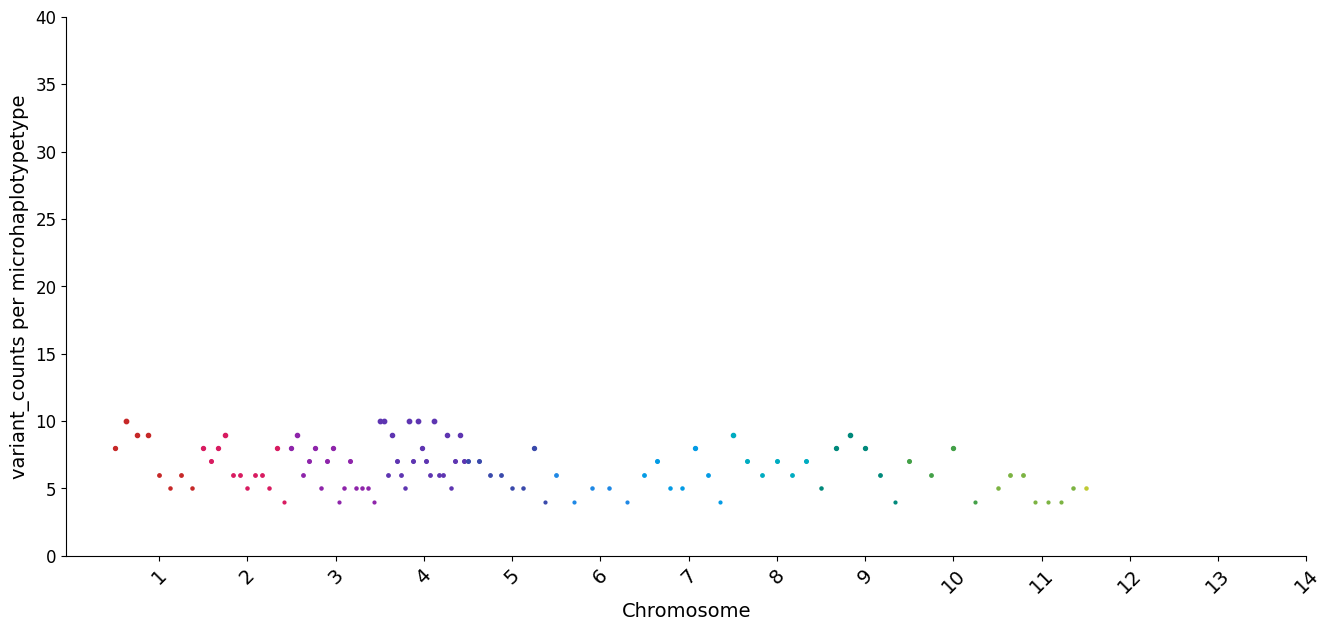

In [11]:
plot_man(snp_highest_het_3_10, 'variant_counts', 40)

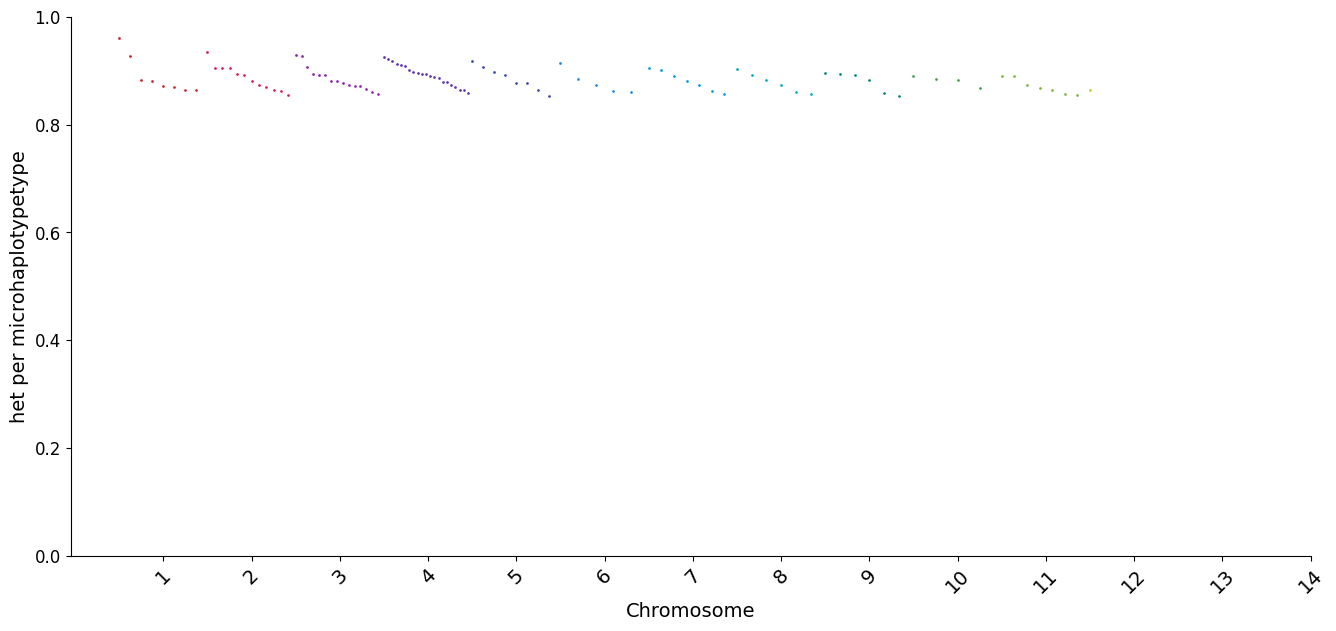

In [12]:
plot_man(snp_highest_het_3_10, 'het', 1)

In [13]:
# How many chromosomes are covered
chroms = snp_highest_het_3_10.chrom.unique()
print(len(chroms), ' of 14 chromosomes covered')

12  of 14 chromosomes covered


In [51]:
def evaluate_spacing(df):
  distance = 0

  for chrom in df.chrom.unique():
    # select mhaps for chromosome ordered by window position
    df_chrom = df.loc[df.chrom==chrom].sort_values('window_start')
    first_window_in_chrom = df_chrom.window_start.min()
    for index, row in df_chrom.iterrows():
      distance += (row.window_start - first_window_in_chrom)
      first_window_in_chrom = row.window_start
  average_distance_per_mhap = distance / df.shape[0]
  return average_distance_per_mhap

In [52]:
evaluate_spacing(snp_highest_het_3_10)

89367.99

# Or maximise the distance between each microhaplotype

In [16]:
# Select microhaplotype candidates with het > 0.5
snp_results_3_10_high_het_df = snp_results_3_10_df.loc[snp_results_3_10_df.het>0.5]

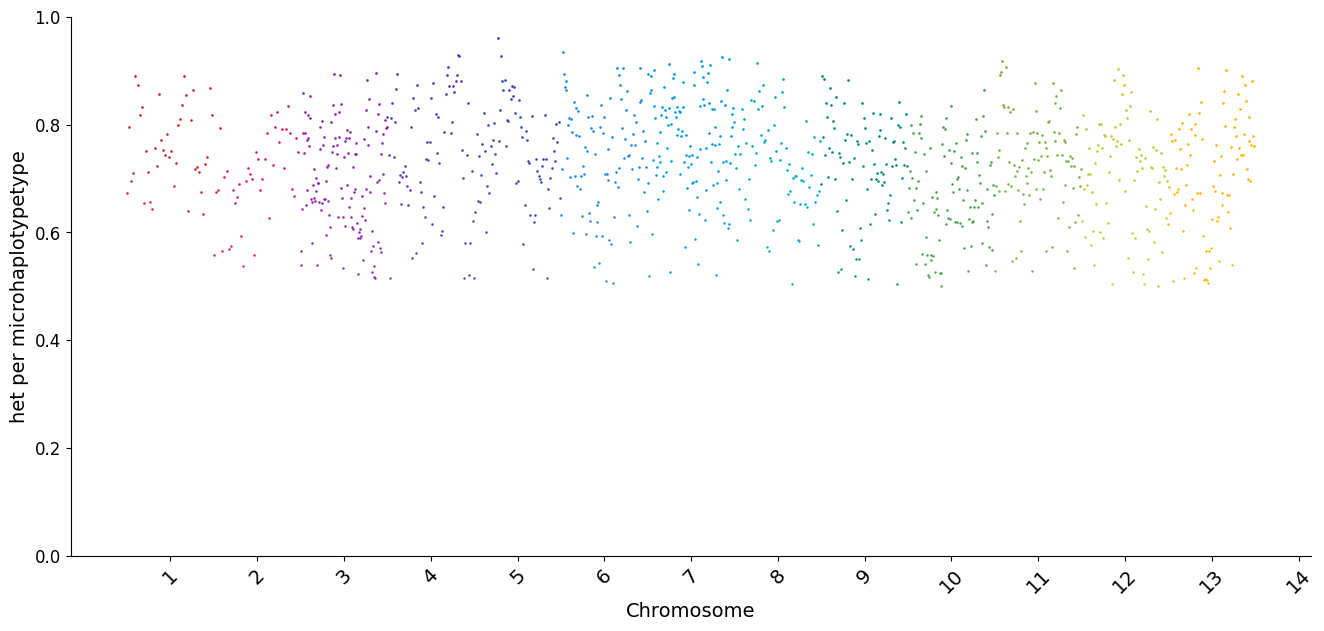

In [17]:
plot_man(snp_results_3_10_high_het_df, 'het', 1)

In [1]:
# pv4_regions = pd.read_csv(
#     "../supplementary_files/Pv4_regions.bed", sep="\t", comment="t", names=["chrom", "chromStart", "chromEnd", "name"]
# )
# core_df = pv4_regions.loc[pv4_regions.name=='Core']
# core_df.head()

In [40]:
length = 0
for chrom in unique_chroms:
  snp_results_chrom = snp_results_3_10_high_het_df.loc[snp_results_3_10_high_het_df.chrom==chrom]
  chrom_start = snp_results_chrom.window_start.min()
  chrom_end = snp_results_chrom.window_end.max()
  length += chrom_end - chrom_start
length

17576863

In [41]:
n_mhaps= 100
# core_genome_length = sum(core_df.chromEnd-core_df.chromStart)
ideal_mhap_spacing = length / n_mhaps
# buffer_region = ideal_mhap_spacing/10

In [57]:
# # Pick out max het from buffer region around distance
# df_index = []

# for chrom in chroms:
#   snp_results_chrom = snp_results_3_10_high_het_df.loc[snp_results_3_10_high_het_df.chrom==chrom]
#   min_start = snp_results_chrom.window_start.min()
#   max_start = snp_results_chrom.window_start.max()

#   while min_start <= max_start:
#     # Get all the options within the biffer region and choose one with max het
#     choice_options = snp_results_chrom.loc[snp_results_chrom.window_start.between(min_start,min_start+buffer_region)]
#     if len(choice_options) > 0:
#       choice = choice_options[choice_options.het == choice_options.het.max()]
#       df_index.append(choice_options.het.idxmax())
#     else:
#       print(min_start, '-', min_start+buffer_region, 'region had no candidates')
#     min_start += ideal_mhap_spacing


997317.56 - 1039866.5880000001 region had no candidates
696800.28 - 739349.3080000001 region had no candidates
1336987.84 - 1379536.868 region had no candidates
526955.28 - 569504.3080000001 region had no candidates


In [42]:
def select_spaced_mhaps(df, buffer_region, ideal_mhap_spacing):
  df_index = []

  for chrom in df.chrom.unique():
    # Select options for chromosome
    df_chrom = df.loc[df.chrom==chrom]

    # Find min and max start point for microhaplotype candidated in this chrom
    min_start = df_chrom.window_start.min()
    max_start = df_chrom.window_start.max()

    while min_start <= max_start:
      # Get all the options within the buffer region around the start point
      choice_options = df_chrom.loc[df_chrom.window_start.between(min_start,min_start+buffer_region)]
      if len(choice_options) > 0:
        choice = choice_options[choice_options.het == choice_options.het.max()]
        df_index.append(choice_options.het.idxmax())
      else:
        print(min_start, '-', min_start+buffer_region, 'region had no candidates')
      # Move the start point along by the ideal spacing
      min_start += ideal_mhap_spacing
  selected_mhaps_df = df.loc[df_index]
  return  selected_mhaps_df


In [67]:
# selected_mhaps = select_spaced_mhaps(snp_results_3_10_high_het_df, buffer_region, ideal_mhap_spacing)

526955.28 - 569504.3080000001 region had no candidates
696800.28 - 739349.3080000001 region had no candidates
997317.56 - 1039866.5880000001 region had no candidates
1336987.84 - 1379536.868 region had no candidates


In [58]:
buffer_region_divisions = [1,5,10,20,30,40,50,60,70,80,100,200,300,400,500,600,700,800,900,1000]
average_space_between_mhaps = []
average_het = []
selected_mhaps_options = []

for buffer_region_division in buffer_region_divisions:
  print(buffer_region_division)
  buffer_region = ideal_mhap_spacing/buffer_region_division
  print(buffer_region)
  selected_mhaps = select_spaced_mhaps(snp_results_3_10_high_het_df, buffer_region, ideal_mhap_spacing)
  selected_mhaps_options.append(selected_mhaps)
  # print(len(selected_mhaps.chrom.unique()), ' of 14 chromosomes covered')
  selected_mhaps_options.append(selected_mhaps)
  average_space_between_mhaps.append(evaluate_spacing(selected_mhaps))
  average_het.append(selected_mhaps.het.mean())

1
175768.63
236285.63 - 412054.26 region had no candidates
204489.63 - 380258.26 region had no candidates
380258.26 - 556026.89 region had no candidates
1494564.4099999997 - 1670333.0399999996 region had no candidates
415955.26 - 591723.89 region had no candidates
1679954.67 - 1855723.2999999998 region had no candidates
1296301.4100000001 - 1472070.04 region had no candidates
5
35153.726
698730.26 - 733883.986 region had no candidates
453002.26 - 488155.98600000003 region had no candidates
286876.63 - 322030.356 region had no candidates
638413.89 - 673567.616 region had no candidates
622847.26 - 658000.986 region had no candidates
322105.63 - 357259.356 region had no candidates
849411.52 - 884565.246 region had no candidates
1200948.78 - 1236102.506 region had no candidates
759673.52 - 794827.246 region had no candidates
935442.15 - 970595.876 region had no candidates
236285.63 - 271439.356 region had no candidates
412054.26 - 447207.98600000003 region had no candidates
587822.89 - 622

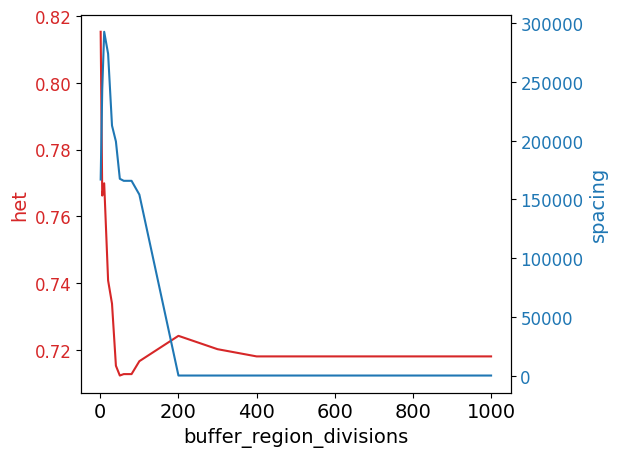

In [63]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('buffer_region_divisions')
ax1.set_ylabel('het', color=color)
ax1.plot(buffer_region_divisions, average_het, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('spacing', color=color)  # we already handled the x-label with ax1
ax2.plot(buffer_region_divisions, average_space_between_mhaps, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Need to add onto the graph above a marker for when there isn't a full set of mhaps selected. E.g. if the region is small then there may not be an mhap to select